# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()
print(df)

        Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sport

### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

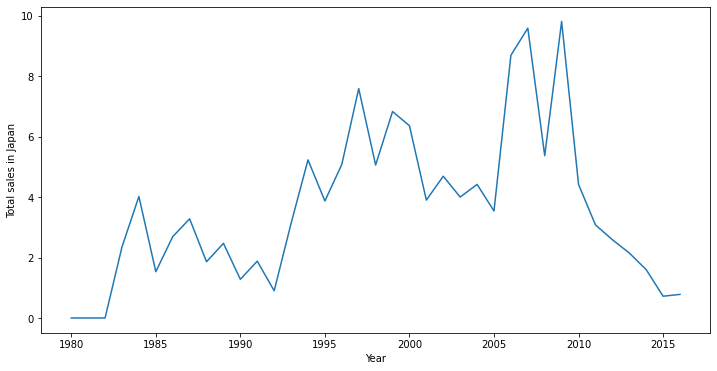

In [3]:
data = pd.read_csv('vgsales.csv')

sales_jp = data.query("Genre == 'Sports'").groupby(['Year'])['JP_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Total sales in Japan")

sales_jp.plot()
plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

C:\Windows\Temp\ipykernel_8780\2488117020.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  activision_data.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'].sum().plot(kind='line', ax=ax)


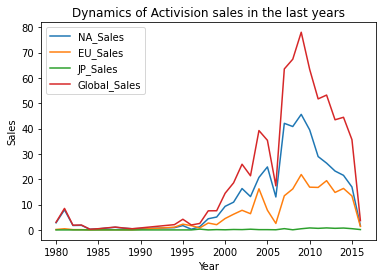

In [4]:
activision_data = data[data.Publisher == 'Activision']

ax = plt.subplot()
activision_data.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'].sum().plot(kind='line', ax=ax)
plt.title('Dynamics of Activision sales in the last years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

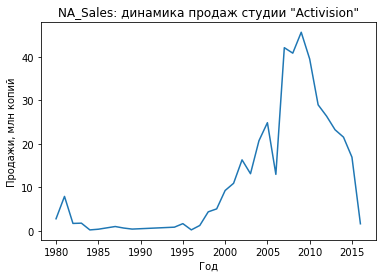

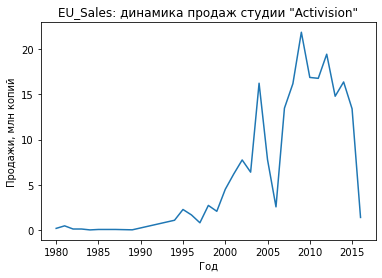

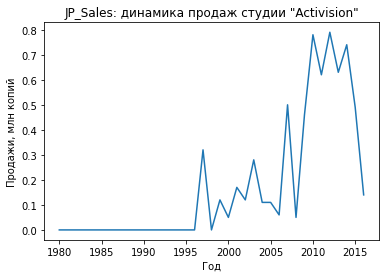

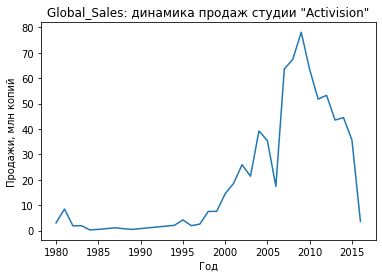

In [5]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']



data = df[df['Publisher'] == 'Activision'].groupby('Year')[cols].sum()





for col in cols:

    fig, ax = plt.subplots()

    ax.plot(data.index, data[col], label=col)

    ax.set_title(col + ': динамика продаж студии "Activision"')

    ax.set_xlabel('Год')

    ax.set_ylabel('Продажи, млн копий')

plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

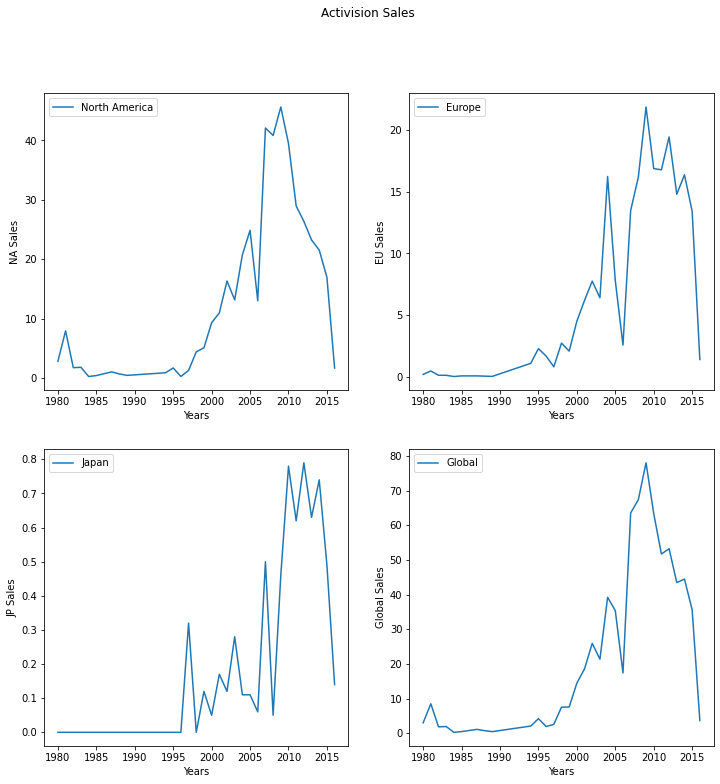

In [72]:
data = pd.read_csv('vgsales.csv')

plt.figure(figsize=(12, 12))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(NA_Sales['Year'], NA_Sales['NA_Sales'], label='North America')
ax1.set_xlabel('Years')
ax1.set_ylabel('NA Sales')
ax1.legend(loc='upper left')

ax2 = plt.subplot(2, 2, 2)
ax2.plot(EU_Sales['Year'], EU_Sales['EU_Sales'], label='Europe')
ax2.set_xlabel('Years')
ax2.set_ylabel('EU Sales')
ax2.legend(loc='upper left')

ax3 = plt.subplot(2, 2, 3)
ax3.plot(JP_Sales['Year'], JP_Sales['JP_Sales'], label='Japan')
ax3.set_xlabel('Years')
ax3.set_ylabel('JP Sales')
ax3.legend(loc='upper left')

ax4 = plt.subplot(2, 2, 4)
ax4.plot(Global_Sales['Year'], Global_Sales['Global_Sales'], label='Global')
ax4.set_xlabel('Years')
ax4.set_ylabel('Global Sales')
ax4.legend(loc='upper left')

plt.suptitle('Activision Sales')

plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

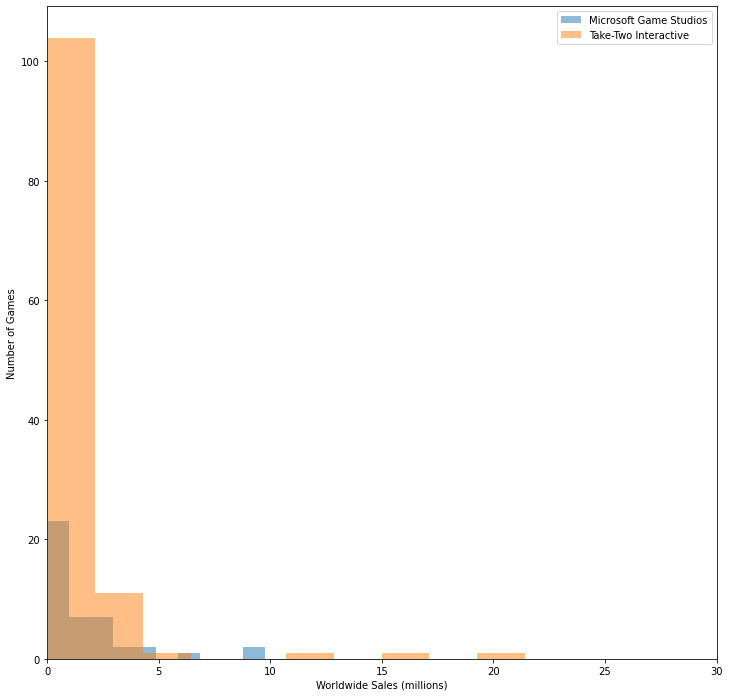

In [41]:
df = pd.read_csv('vgsales.csv') 


#создаем фреймы по нужным издателям
df_MS = df[df['Publisher']=='Microsoft Game Studios'].loc[(df['Year']>2010)]
df_TT = df[df['Publisher']=='Take-Two Interactive'].loc[(df['Year']>2010)]

#создаем переменные для данных гистограмм
data_MS = df_MS['Global_Sales']
data_TT = df_TT['Global_Sales']

#создаем гистограммы
plt.hist(data_MS, alpha=0.5, label='Microsoft Game Studios')
plt.hist(data_TT, alpha=0.5, label='Take-Two Interactive')

#добавляем метки и границы
plt.xlabel('Worldwide Sales (millions)')
plt.ylabel('Number of Games')
plt.xlim(0,30)

#добавляем легенду
plt.legend()

#выводим график
plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

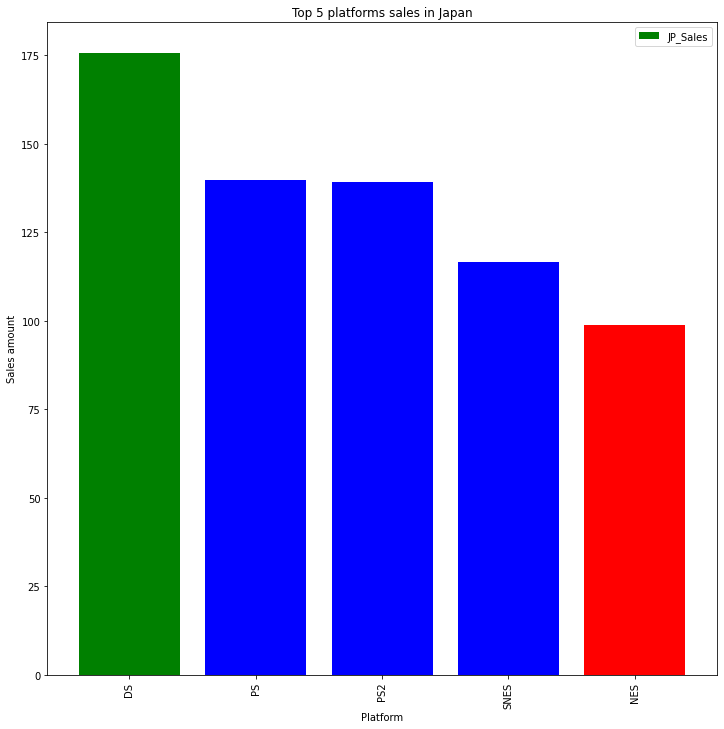

In [49]:
# Чтение датасета
df = pd.read_csv("vgsales.csv")

japan_sales = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).reset_index()

# Отбираем первые 5 платформ
top_5_platforms = japan_sales.head()

# Строим диаграмму
top_5_platforms.plot.bar(x='Platform', y='JP_Sales', width=0.8, color=['green', 'blue', 'blue', 'blue', 'red'])
plt.title('Top 5 platforms sales in Japan')
plt.ylabel('Sales amount')
plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

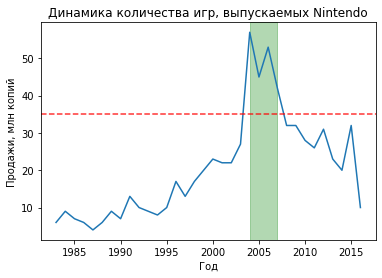

In [6]:
data = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count()

min_year, max_year = data[data > 35].index.min(), data[data > 35].index.max()



fig, ax = plt.subplots()



ax.plot(data.index, data)

ax.axvspan(xmin=min_year, xmax=max_year, color='green', alpha=0.3)

ax.axhline(y=35, linestyle='--', color='r', alpha=0.8)



ax.set_title('Динамика количества игр, выпускаемых Nintendo')

ax.set_xlabel('Год')

ax.set_ylabel('Продажи, млн копий')



plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

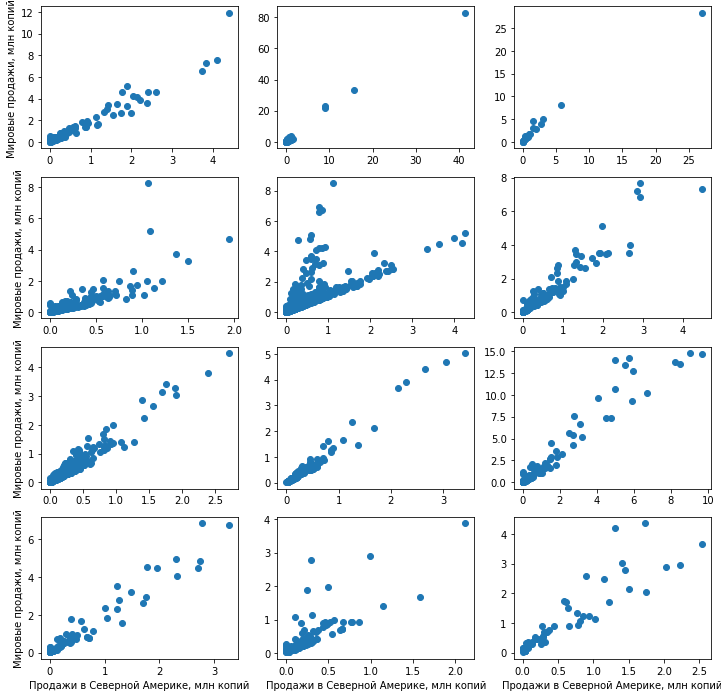

In [7]:
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(3).index

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(4).index



fig, axs = plt.subplots(nrows=len(top_publishers), ncols=len(top_genres), figsize=(12, 12))



for i, pub in enumerate(top_publishers):

    for j, genre in enumerate(top_genres):

        ax = axs[i][j]

        

        data = df.query('Genre == @genre and Publisher == @pub')[['Global_Sales', 'NA_Sales']]

        ax.scatter(data['NA_Sales'], data['Global_Sales'])

        

        if i == len(top_publishers) - 1:

            ax.set_xlabel('Продажи в Северной Америке, млн копий')

        

        if j == 0:

            ax.set_ylabel('Мировые продажи, млн копий')

plt.show()